tensor([[ 0.0040, -0.0153]], grad_fn=<ReshapeAliasBackward0>) tensor([0.], requires_grad=True)
epoch 1, loss 0.029582
epoch 2, loss 0.000054
epoch 3, loss 0.000001
w的估计误差: tensor([ 6.0678e-05, -2.3270e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)


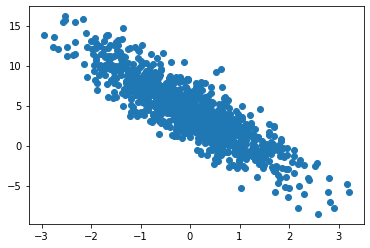

In [10]:
import random
import torch
import matplotlib.pyplot as plt

def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.001, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

#plt.scatter(features[:, 0], labels)
plt.scatter(features[:, 1], labels)

#读取小批量
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

#for X, y in data_iter(batch_size, features, labels):
#    print(X, '\n', y)
#    break
    
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w.reshape(1, -1), b)

def linreg(X, w, b):  
    """线性回归模型。"""
    return torch.matmul(X, w) + b
def squared_loss(y_hat, y):  
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2
def sgd(params, lr, batch_size):  
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

In [9]:
c = torch.tensor([[1, 2, 3], [4, 5, 6]])
c, c.reshape(3, 2)

(tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[1, 2],
         [3, 4],
         [5, 6]]))